In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error


In [172]:
train = pd.read_csv('_Train__202304241738.csv')

In [173]:
train.describe(include='all')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,912.000000,912,912,912,912.000000,912,912,912,912,912,912,912,912.000000
unique,NaN,19,467,6,NaN,34,96,8,32,94,9,166,NaN
top,NaN,Lenovo,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,215,21,515,NaN,345,133,430,293,197,751,88,NaN
mean,669.402412,NaN,NaN,NaN,14.982785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1116.964013
std,379.372130,NaN,NaN,NaN,1.417299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,681.619330
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.900000
25%,345.750000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598.000000
50%,676.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000
75%,993.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1476.332500


In [174]:
train.shape

(912, 13)

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [176]:
train.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1104,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.4kg,387.0
1,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23kg,1379.0
2,172,Acer,Aspire A517-51G,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,3kg,854.0
3,918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,1483.0
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8GB,1TB HDD,AMD Radeon R4,Windows 10,2.8kg,519.0
5,1150,Lenovo,IdeaPad 500-15ISK,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16GB,1.0TB Hybrid,AMD Radeon R7 M360,Windows 10,2.5kg,1099.0
6,63,Lenovo,IdeaPad 520S-14IKB,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.7kg,599.0
7,108,HP,Pavilion 14-BK001nv,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.58kg,659.0
8,644,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.23kg,1869.0
9,386,HP,Omen 17-w212nv,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.35kg,1191.0


In [177]:
train['ScreenResolution'].unique()

array(['1366x768', 'Quad HD+ / Touchscreen 3200x1800',
       'IPS Panel Full HD 1920x1080', 'Full HD 1920x1080', '1600x900',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       'Full HD / Touchscreen 1920x1080', '1440x900',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'Touchscreen 2256x1504',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
       'IPS Panel 1366x768', '4K Ultra HD 3840x2160',
       'IPS Panel 4K Ultra HD 3840x2160',
       'IPS Panel Retina Display 2880x1800',
       'IPS Panel Touchscreen 2560x1440', 'Touchscreen 1366x768',
       '2560x1440', 'IPS Panel Retina Display 2560x1600',
       'Quad HD+ 3200x1800', 'IPS Panel Full HD 2560x1440', '1920x1080',
       'Touchscreen 2400x1600', 'IPS Panel 2560x1440',
       'IPS Panel Quad HD+ 3200x1800', 'IPS Panel Touchscreen 

In [178]:
train['Company'].unique()

array(['Acer', 'Dell', 'HP', 'Lenovo', 'Asus', 'Xiaomi', 'Apple',
       'Samsung', 'Razer', 'Toshiba', 'Fujitsu', 'Microsoft', 'MSI', 'LG',
       'Mediacom', 'Google', 'Vero', 'Huawei', 'Chuwi'], dtype=object)

In [179]:
train['Memory'].unique()

array(['500GB HDD', '256GB SSD', '512GB SSD', '1TB HDD', '1.0TB Hybrid',
       '128GB SSD +  1TB HDD', '256GB SSD +  1TB HDD', '128GB SSD',
       '256GB SSD +  500GB HDD', '256GB Flash Storage',
       '512GB SSD +  1TB HDD', '32GB Flash Storage', '64GB Flash Storage',
       '64GB SSD', '512GB SSD +  256GB SSD', '1TB SSD', '180GB SSD',
       '128GB SSD +  2TB HDD', '128GB Flash Storage', '2TB HDD',
       '1TB HDD +  1TB HDD', '32GB SSD', '16GB Flash Storage',
       '256GB SSD +  256GB SSD', '512GB SSD +  2TB HDD', '16GB SSD',
       '256GB SSD +  2TB HDD', '512GB Flash Storage', '508GB Hybrid',
       '64GB Flash Storage +  1TB HDD', '512GB SSD +  512GB SSD',
       '1TB SSD +  1TB HDD'], dtype=object)

In [180]:
train.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [181]:
train['OpSys'].value_counts()

Windows 10      751
No OS            47
Linux            40
Windows 7        31
Chrome OS        19
Mac OS X          8
macOS             8
Windows 10 S      7
Android           1
Name: OpSys, dtype: int64

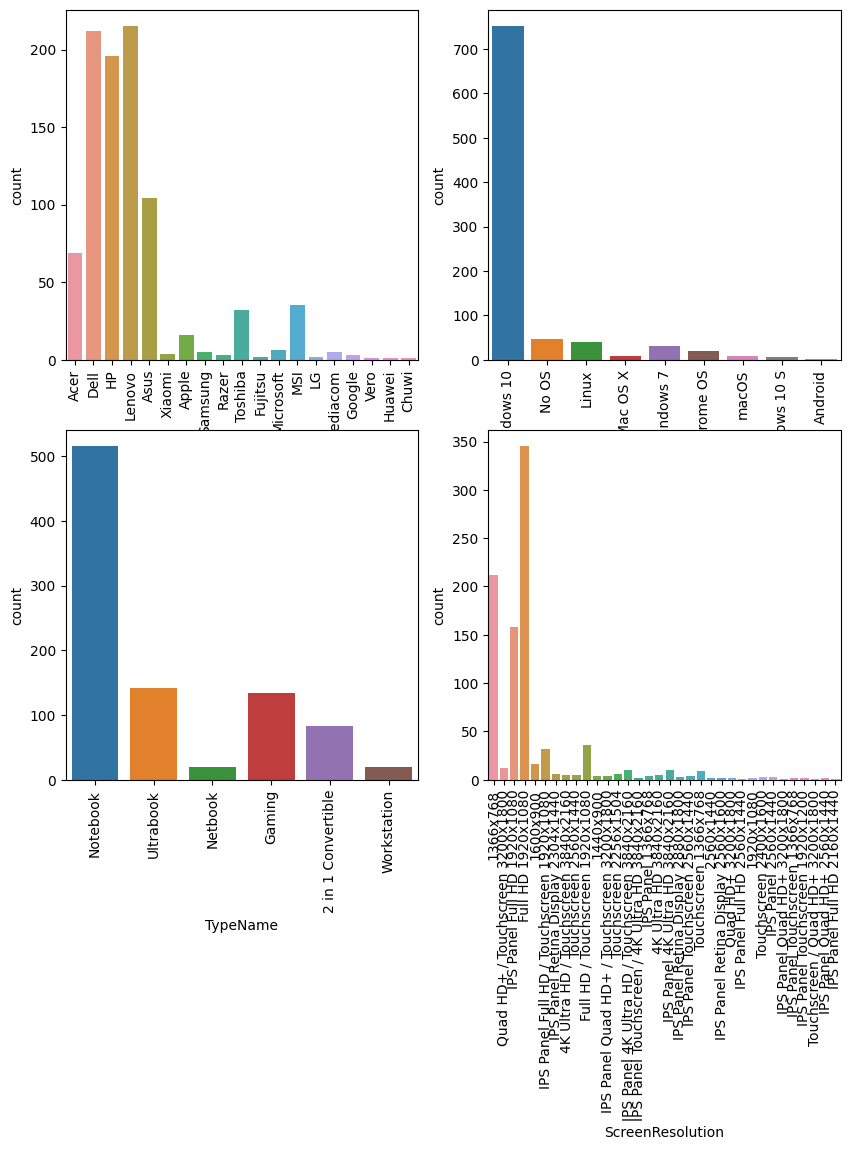

In [182]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
sns.countplot(train, x='Company', ax=axs[0,0])
sns.countplot(train, x='OpSys', ax=axs[0,1])
sns.countplot(train, x='TypeName', ax=axs[1,0])
sns.countplot(train, x='ScreenResolution', ax=axs[1,1])
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90);


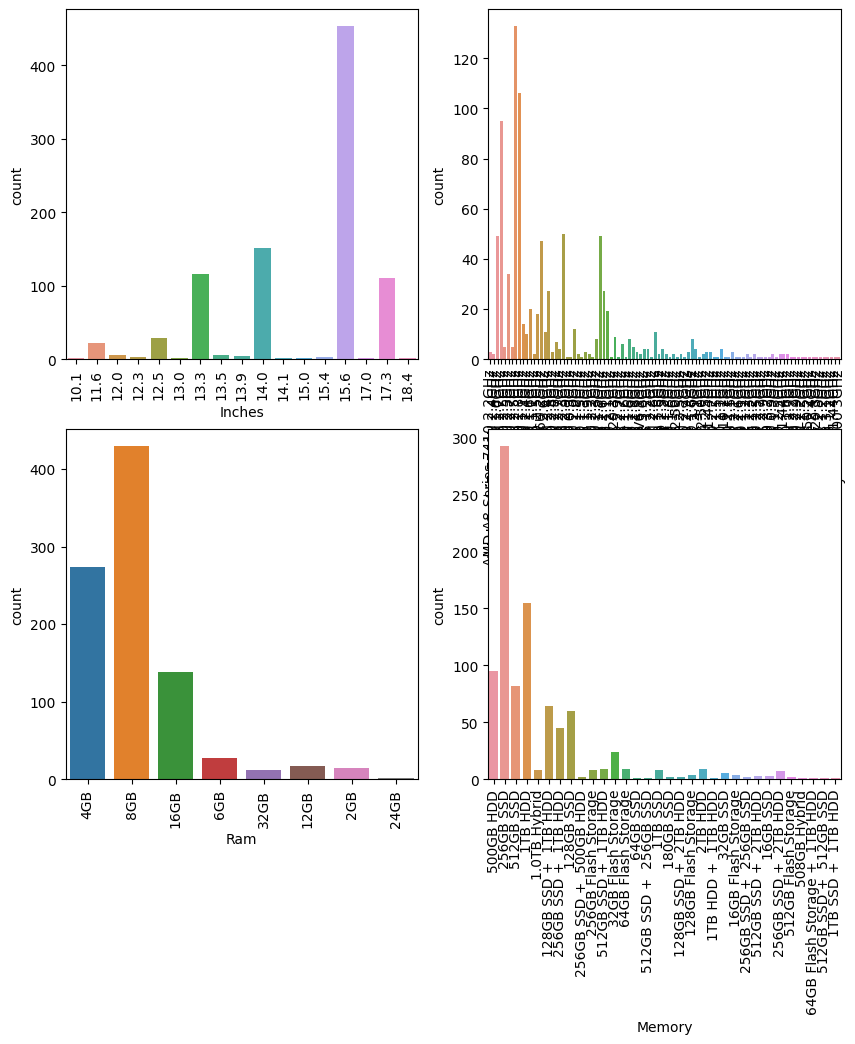

In [183]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
sns.countplot(data=train, x='Inches', ax=axs[0,0])
sns.countplot(data=train, x='Cpu', ax=axs[0,1])
sns.countplot(data=train, x='Ram', ax=axs[1,0])
sns.countplot(data=train, x='Memory',ax=axs[1,1])
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90);

C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":


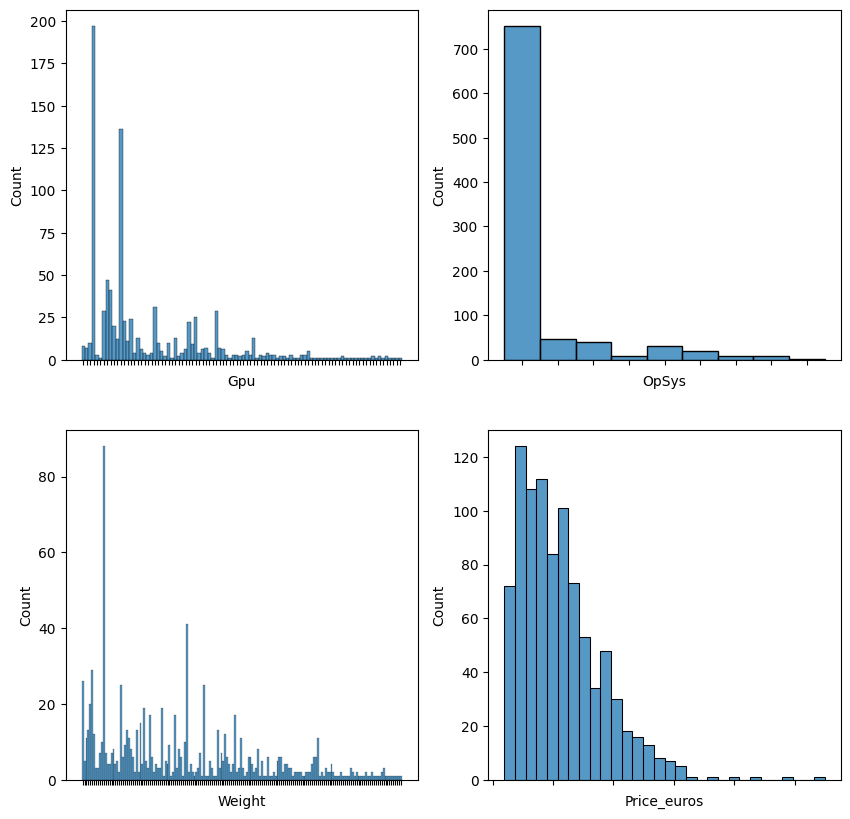

In [184]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
sns.histplot(train, x='OpSys', ax=axs[0,1])
sns.histplot(train, x='Weight', ax=axs[1,0])
sns.histplot(train, x='Price_euros',ax=axs[1,1])
sns.histplot(train, x='Gpu', ax=axs[0,0])
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90);

In [185]:
train.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

### Empiezo a seleccionar las columnas definitivas. 

In [186]:
# Quito la columna Product.
train_1 = train.loc[:,['Company','Cpu','Inches','Ram','TypeName','Weight','Memory','laptop_ID','ScreenResolution','Price_euros', 'Gpu', 'OpSys']]

In [187]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Cpu               912 non-null    object 
 2   Inches            912 non-null    float64
 3   Ram               912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Weight            912 non-null    object 
 6   Memory            912 non-null    object 
 7   laptop_ID         912 non-null    int64  
 8   ScreenResolution  912 non-null    object 
 9   Price_euros       912 non-null    float64
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 85.6+ KB


In [188]:
#Creamos una nueva columna con la media del precio para cada marca
mean_encoding = train_1.groupby('Company')['Price_euros'].mean()
train_1['Company_encoded'] = train_1['Company'].map(mean_encoding)

train_1.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)

Company
Razer        3399.000000
LG           1999.000000
MSI          1861.424571
Google       1677.666667
Samsung      1659.000000
Microsoft    1612.308333
Huawei       1499.000000
Apple        1455.632500
Toshiba      1208.718750
Dell         1180.813491
Xiaomi       1133.462500
HP           1086.775714
Lenovo       1079.256930
Asus         1064.729423
Fujitsu       724.000000
Acer          560.810290
Mediacom      312.200000
Vero          260.000000
Chuwi         244.990000
Name: Price_euros, dtype: float64

In [189]:
# Hago lo mismo con TypeName

mean_encoding = train_1.groupby('TypeName')['Price_euros'].mean()
train_1['TypeName_encoded'] = train_1['TypeName'].map(mean_encoding)

mean_encoding.sort_values()

TypeName
Netbook                675.884211
Notebook               788.550835
2 in 1 Convertible    1303.180120
Ultrabook             1536.767801
Gaming                1706.815970
Workstation           2308.207500
Name: Price_euros, dtype: float64

In [190]:
# En ScreenResolution, multiplico los ejes de la pantalla.  
# Antes de eso, trabajo sobre el string, quedandome con los 9 ultimos digitos, los separo por el 'x', me quedan ancho x alto separados, 
# y mediante una iteracion los multiplico.

train_1['ScreenResolution'] = train_1['ScreenResolution'].str[-9:].str.replace(' ','').str.split('x').apply(lambda h: np.prod([int(i) for i in h]))

train_1['ScreenResolution'].unique()


array([1049088, 5760000, 2073600, 1440000, 3317760, 8294400, 3686400,
       1296000, 3393024, 5184000, 4096000, 3840000, 2304000, 3110400])

In [191]:
# Limpio los strings de Memory hasta tener un numero unico (si hay dos, sumados)

train_1['Ram'] = train_1['Ram'].str.replace('GB','').astype(int)

In [192]:
train_1['Weight'] = train_1['Weight'].str.replace('kg','').astype(float)

In [193]:
train_1['Memory'] = train_1['Memory'].str.replace('GB HDD','')
train_1['Memory'] = train_1['Memory'].str.replace('GB SSD','')
train_1['Memory'] = train_1['Memory'].str.replace('TB HDD','024')
train_1['Memory'] = train_1['Memory'].str.replace('TB SSD','024')
train_1['Memory'] = train_1['Memory'].str.replace('.0TB Hybrid','024')
train_1['Memory'] = train_1['Memory'].str.replace(' ','')
train_1['Memory'] = train_1['Memory'].str.replace('GBFlashStorage', '')
train_1['Memory'] = train_1['Memory'].str.replace('GBHybrid', '')

C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [194]:
# Itero sobre los valores de Memory y sumo los numeros que estan divididos por un +.  Lo sconvierto a int.
train_1['Memory'] = train_1['Memory'].str.split('+').apply(lambda x: sum([int(i) for i in x]))

In [195]:

train_1['Memory'].unique()

array([ 500,  256,  512, 1024, 1152, 1280,  128,  756, 1536,   32,   64,
        768,  180, 2152, 2024, 2048,   16, 2536, 2280,  508, 1088],
      dtype=int64)

In [196]:
# train_1['Cpu_marca'] = train_1['Cpu'].str.extract('(AMD|Intel)', expand=False)

# train_1['Cpu_marca_numerica'] = train_1['Cpu_marca'].astype('category').cat.codes

In [197]:
# Ahora extraigo los procesadores por su string que considero de identificacion unica.
train_1['Cpu_prosesor'] = train_1['Cpu'].str.extract('(i3|i5|i7|Celeron|A6|A7|A8|A9|A10|A12|Pentium|Core M|Atom|E-Series|Ryzen|Xeon|FX)', expand=False)


In [198]:
train_1['Cpu_prosesor'].unique()

array(['A8', 'i7', 'i5', 'A6', 'i3', 'Pentium', 'Celeron', 'Core M',
       'E-Series', 'A9', 'Xeon', 'A12', 'A10', 'Atom', 'FX', 'Ryzen'],
      dtype=object)

In [199]:
# Ahora hago una nueva columna de los procesadores con su promedio por tipo.
mean_encoding = train_1.groupby('Cpu_prosesor')['Price_euros'].mean()
train_1['Cpu_prosesor_encoded'] = train_1['Cpu_prosesor'].map(mean_encoding)

train_1[['Cpu_prosesor','Cpu_prosesor_encoded']].head()

,Cpu_prosesor,Cpu_prosesor_encoded
0,A8,435.000000
1,i7,1584.005601
2,i5,1013.174710
3,i7,1584.005601
4,A6,405.031111


In [200]:
#Creamos una nueva columna con la media del precio para cada sist op
mean_encoding = train_1.groupby('OpSys')['Price_euros'].mean()
train_1['OpSys_encoded'] = train_1['OpSys'].map(mean_encoding)

train_1.groupby('OpSys')['Price_euros'].mean().sort_values(ascending=False)

OpSys
Windows 7       1655.361613
macOS           1648.393750
Windows 10 S    1421.691429
Mac OS X        1262.871250
Windows 10      1156.522676
Linux            628.744250
Chrome OS        622.047368
No OS            601.634255
Android          319.000000
Name: Price_euros, dtype: float64

In [201]:
#Creamos una nueva columna con la media del precio para cada marca
mean_encoding = train_1.groupby('Gpu')['Price_euros'].mean()
train_1['Gpu_encoded'] = train_1['Gpu'].map(mean_encoding)

train_1.groupby('Gpu')['Price_euros'].mean().sort_values(ascending=False)

Gpu
Nvidia Quadro M2000M       4389.000000
Nvidia Quadro M3000M       3949.400000
Nvidia GeForce GTX 1080    3765.666667
Nvidia Quadro M2200M       3146.000000
Nvidia Quadro M620M        2999.000000
                              ...     
Intel HD Graphics           376.653182
Intel HD Graphics 500       339.031600
AMD Radeon R2 Graphics      315.000000
Intel HD Graphics 400       307.117391
AMD Radeon R2               267.995000
Name: Price_euros, Length: 94, dtype: float64

In [202]:
train_1.head(5)

,Company,Cpu,Inches,Ram,TypeName,Weight,Memory,laptop_ID,ScreenResolution,Price_euros,Gpu,OpSys,Company_encoded,TypeName_encoded,Cpu_prosesor,Cpu_prosesor_encoded,OpSys_encoded,Gpu_encoded
0,Acer,AMD A8-Series 7410 2.2GHz,15.6,4,Notebook,2.40,500,1104,1049088,387.0,AMD Radeon R5,Windows 10,560.810290,788.550835,A8,435.000000,1156.522676,446.861250
1,Dell,Intel Core i7 7560U 2.4GHz,13.3,8,Ultrabook,1.23,256,114,5760000,1379.0,Intel Iris Plus Graphics 640,Windows 10,1180.813491,1536.767801,i7,1584.005601,1156.522676,1799.077143
2,Acer,Intel Core i5 8250U 1.6GHz,17.3,8,Notebook,3.00,256,172,2073600,854.0,Nvidia GeForce MX150,Windows 10,560.810290,788.550835,i5,1013.174710,1156.522676,1048.985000
3,HP,Intel Core i7 7500U 2.7GHz,12.5,8,Netbook,1.26,512,918,2073600,1483.0,Intel HD Graphics 620,Windows 10,1086.775714,675.884211,i7,1584.005601,1156.522676,1172.156294
4,Lenovo,AMD A6-Series 9220 2.5GHz,17.3,8,Notebook,2.80,1024,447,1440000,519.0,AMD Radeon R4,Windows 10,1079.256930,788.550835,A6,405.031111,1156.522676,405.000000


In [203]:
# TEngo que hacer el mismo trabajo en 'Test", pero ese dataset no tiene la columna de precios. Entonces el codigo no va afuncionar al querer crear las columnas con los precios.
# Lo resuelvo haciendo un diccionario con llave:precio, y lo exporto en un .json, par aimportarlo luego desde 'Test'
Processor_dict = dict(train_1.groupby('Cpu_prosesor')['Cpu_prosesor_encoded'].mean().sort_values(ascending=False))
Processor_dict

{'Xeon': 3584.0,
 'Ryzen': 1622.0,
 'i7': 1584.0056010928963,
 'Core M': 1266.457142857143,
 'i5': 1013.1747098976109,
 'FX': 999.0,
 'A12': 631.1425,
 'A10': 577.67,
 'i3': 550.4480198019802,
 'A9': 487.7757142857143,
 'Pentium': 439.562962962963,
 'A8': 435.0,
 'A6': 405.0311111111111,
 'Celeron': 317.2581666666667,
 'E-Series': 296.198,
 'Atom': 289.815}

In [204]:
Company_dict = dict(train_1.groupby('Company')['Company_encoded'].mean().sort_values(ascending=False))
Company_dict

{'Razer': 3399.0,
 'LG': 1999.0,
 'MSI': 1861.4245714285714,
 'Google': 1677.6666666666667,
 'Samsung': 1659.0,
 'Microsoft': 1612.3083333333334,
 'Huawei': 1499.0,
 'Apple': 1455.6325,
 'Toshiba': 1208.71875,
 'Dell': 1180.8134905660377,
 'Xiaomi': 1133.4625,
 'HP': 1086.7757142857142,
 'Lenovo': 1079.256930232558,
 'Asus': 1064.729423076923,
 'Fujitsu': 724.0,
 'Acer': 560.8102898550725,
 'Mediacom': 312.2,
 'Vero': 260.0,
 'Chuwi': 244.99}

In [205]:
TypeName_dict = dict(train_1.groupby('TypeName')['TypeName_encoded'].mean().sort_values(ascending=False))
TypeName_dict

{'Workstation': 2308.2075,
 'Gaming': 1706.8159701492536,
 'Ultrabook': 1536.7678014184398,
 '2 in 1 Convertible': 1303.1801204819276,
 'Notebook': 788.5508349514563,
 'Netbook': 675.8842105263158}

In [206]:
Gpu_dict = dict(train_1.groupby('Gpu')['Gpu_encoded'].mean().sort_values(ascending=False))
Gpu_dict

{'Nvidia Quadro M2000M': 4389.0,
 'Nvidia Quadro M3000M': 3949.4,
 'Nvidia GeForce GTX 1080': 3765.6666666666665,
 'Nvidia Quadro M2200M': 3146.0,
 'Nvidia Quadro M620M': 2999.0,
 'Nvidia Quadro 3000M': 2968.0,
 'Nvidia GTX 980 SLI': 2799.0,
 'Nvidia GeForce GTX 1070': 2627.08,
 'Nvidia Quadro M520M': 2577.0,
 'AMD Radeon Pro 455': 2537.45,
 'AMD Radeon Pro 555': 2439.97,
 'Nvidia Quadro M1200': 2385.975,
 'Nvidia GeForce 960M': 2250.68,
 'Nvidia Quadro M2200': 2241.95,
 'Intel Iris Pro Graphics': 2139.97,
 'Intel Iris Plus Graphics 650': 2040.0,
 'Nvidia GeForce GTX 980M': 1973.0900000000001,
 'Nvidia GeForce GTX 970M': 1895.3425,
 'Nvidia Quadro M620': 1877.25,
 'Intel Iris Plus Graphics 640': 1799.077142857143,
 'Intel Iris Graphics 540': 1799.0,
 'Nvidia Quadro M1000M': 1730.0,
 'Nvidia GeForce GTX 1060': 1718.4896774193548,
 'AMD Radeon RX 580': 1664.3333333333333,
 'Intel HD Graphics 615': 1475.85,
 'Nvidia GeForce 930M': 1403.8,
 'AMD FirePro W5130M': 1369.0,
 'Nvidia GeForce GT

In [207]:
OpSys_dict = dict(train_1.groupby('OpSys')['OpSys_encoded'].mean().sort_values(ascending=False))
OpSys_dict

{'Windows 7': 1655.3616129032257,
 'macOS': 1648.39375,
 'Windows 10 S': 1421.6914285714286,
 'Mac OS X': 1262.87125,
 'Windows 10': 1156.5226764314248,
 'Linux': 628.74425,
 'Chrome OS': 622.0473684210526,
 'No OS': 601.634255319149,
 'Android': 319.0}

In [208]:
import json

# Exportar el diccionario a un archivo de texto plano
with open('Processor_dict.json', 'w') as archivo:
    json.dump(Processor_dict, archivo)

with open('NameType_dict.json', 'w') as archivo:
    json.dump(TypeName_dict, archivo)

with open('Company_dict.json', 'w') as archivo:
    json.dump(Company_dict, archivo)

with open('OpSys_dict.json', 'w') as archivo:
    json.dump(OpSys_dict, archivo)

with open('Gpu_dict.json', 'w') as archivo:
    json.dump(Gpu_dict, archivo)

In [209]:
#Finalmente quito las columnas string que me quedaron
train_2 = train_1.drop(columns=['Company','Cpu', 'TypeName', 'Cpu_prosesor','laptop_ID','Inches', 'Gpu','OpSys'])

In [210]:
train_2.head()

,Ram,Weight,Memory,ScreenResolution,Price_euros,Company_encoded,TypeName_encoded,Cpu_prosesor_encoded,OpSys_encoded,Gpu_encoded
0,4,2.40,500,1049088,387.0,560.810290,788.550835,435.000000,1156.522676,446.861250
1,8,1.23,256,5760000,1379.0,1180.813491,1536.767801,1584.005601,1156.522676,1799.077143
2,8,3.00,256,2073600,854.0,560.810290,788.550835,1013.174710,1156.522676,1048.985000
3,8,1.26,512,2073600,1483.0,1086.775714,675.884211,1584.005601,1156.522676,1172.156294
4,8,2.80,1024,1440000,519.0,1079.256930,788.550835,405.031111,1156.522676,405.000000


In [240]:
# Tengo todo nuemrico
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ram               912 non-null    int32  
 1   Weight            912 non-null    float64
 2   Memory            912 non-null    int64  
 3   ScreenResolution  912 non-null    int32  
 4   Price_euros       912 non-null    float64
 5   Company           912 non-null    float64
 6   TypeName          912 non-null    float64
 7   Cpu               912 non-null    float64
 8   OpSys             912 non-null    float64
 9   Gpu               912 non-null    float64
dtypes: float64(7), int32(2), int64(1)
memory usage: 64.2 KB


In [215]:
train_2.describe()

,Ram,Weight,Memory,ScreenResolution,Price_euros,Company_encoded,TypeName_encoded,Cpu_prosesor_encoded,OpSys_encoded,Gpu_encoded
count,912.000000,912.000000,912.000000,9.120000e+02,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,8.269737,2.021819,607.631579,2.172233e+06,1116.964013,1116.964013,1116.964013,1116.964013,1116.964013,1116.964013
std,4.822382,0.653525,473.339970,1.428912e+06,681.619330,278.637646,421.658997,482.559059,210.970952,535.890830
min,2.000000,0.690000,16.000000,1.049088e+06,191.900000,244.990000,675.884211,289.815000,319.000000,267.995000
25%,4.000000,1.500000,256.000000,1.296000e+06,598.000000,1079.256930,788.550835,617.774375,1156.522676,872.150345
50%,8.000000,2.040000,500.000000,2.073600e+06,979.000000,1086.775714,788.550835,1013.174710,1156.522676,1172.156294
75%,8.000000,2.300000,1024.000000,2.073600e+06,1476.332500,1180.813491,1536.767801,1584.005601,1156.522676,1229.518085
max,32.000000,4.600000,2536.000000,8.294400e+06,5499.000000,3399.000000,2308.207500,3584.000000,1655.361613,4389.000000


In [216]:
# Renombro las columnas con su nombre original
train_2.rename(columns={'OpSys_encoded':'OpSys', 'Gpu_encoded':'Gpu', 'Company_encoded':'Company', 'TypeName_encoded':'TypeName','Cpu_prosesor_encoded':'Cpu'}, inplace=True)

In [217]:
train_2.columns

Index(['Ram', 'Weight', 'Memory', 'ScreenResolution', 'Price_euros', 'Company',
       'TypeName', 'Cpu', 'OpSys', 'Gpu'],
      dtype='object')

In [220]:
train_2.shape

(912, 10)

In [221]:
train_2.to_csv('train 4.csv')

## Visualizacion de los datos NUMERICOS

In [222]:
# sns.pairplot(train_2)

In [223]:
train_2.columns

Index(['Ram', 'Weight', 'Memory', 'ScreenResolution', 'Price_euros', 'Company',
       'TypeName', 'Cpu', 'OpSys', 'Gpu'],
      dtype='object')

In [224]:
# fig, axs = plt.subplots(ncols=8, figsize=(25, 3))
# sns.histplot(data=train_2, x='Inches', kde=False, ax=axs[0])
# sns.histplot(data=train_2, x='Ram', kde=False, ax=axs[1])
# sns.histplot(data=train_2, x='Memory', kde=False, ax=axs[2])
# sns.histplot(data=train_2, x='ScreenResolution', kde=False, ax=axs[3])
# # sns.histplot(data=train_2, x='Company_encoded', kde=False, ax=axs[4])
# # sns.histplot(data=train_2, x='TypeName_encoded', kde=False, ax=axs[6])
# # sns.histplot(data=train_2, x='Cpu_prosesor_encoded', kde=False, ax=axs[7])
# sns.histplot(data=train_2, x='Price_euros', kde=False, ax=axs[5])


In [225]:
train_2.corr()

,Ram,Weight,Memory,ScreenResolution,Price_euros,Company,TypeName,Cpu,OpSys,Gpu
Ram,1.000000,0.375818,0.359142,0.447872,0.743057,0.336828,0.493433,0.613540,0.135932,0.638328
Weight,0.375818,1.000000,0.531372,-0.026031,0.183293,0.048581,0.153241,0.189798,-0.070297,0.396515
Memory,0.359142,0.531372,1.000000,0.091233,0.144934,0.162979,0.158750,0.232785,-0.078287,0.226915
ScreenResolution,0.447872,-0.026031,0.091233,1.000000,0.535584,0.202461,0.316344,0.392172,0.122723,0.358063
Price_euros,0.743057,0.183293,0.144934,0.535584,1.000000,0.408788,0.618614,0.707960,0.309514,0.786203
Company,0.336828,0.048581,0.162979,0.202461,0.408788,1.000000,0.341166,0.311988,0.125446,0.358034
TypeName,0.493433,0.153241,0.158750,0.316344,0.618614,0.341166,1.000000,0.544498,0.206922,0.591013
Cpu,0.613540,0.189798,0.232785,0.392172,0.707960,0.311988,0.544498,1.000000,0.200261,0.623942
OpSys,0.135932,-0.070297,-0.078287,0.122723,0.309514,0.125446,0.206922,0.200261,1.000000,0.226569
Gpu,0.638328,0.396515,0.226915,0.358063,0.786203,0.358034,0.591013,0.623942,0.226569,1.000000


In [226]:
# train_3 = train_2.drop(columns='Price_euros')

In [227]:
# train_3.columns

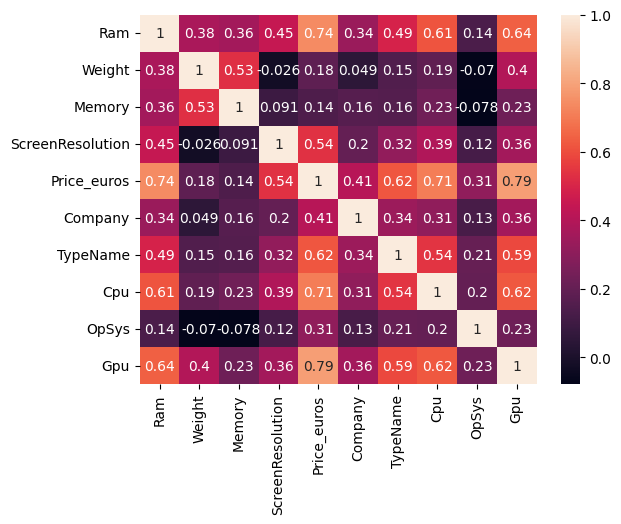

In [228]:
sns.heatmap(train_2.corr(),annot=True);

In [229]:
train_2.columns

Index(['Ram', 'Weight', 'Memory', 'ScreenResolution', 'Price_euros', 'Company',
       'TypeName', 'Cpu', 'OpSys', 'Gpu'],
      dtype='object')

y = a + b1*X + b2*X

In [230]:
X = train_2.drop(['Price_euros'], axis=1)

y = train_2['Price_euros'].copy()
X.shape

(912, 9)

In [231]:
# y = train_2['Price_euros']

## Entrenamos el modelo

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [233]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (912, 9)
Train features shape: (729, 9)
Train target shape: (729,)
Test features shape: (183, 9)
Test target shape: (183,)


In [234]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Hay que chequear los coeficientes

In [235]:
print(lm.intercept_)
print(lm.coef_)

-625.7543762749065
[ 4.25204163e+01 -7.61915239e+01 -1.16960719e-01  7.66044568e-05
  1.97049934e-01  1.32490984e-01  2.34804308e-01  2.72520309e-01
  4.60156038e-01]


Hacemos un DataFrame de los coeficientes

In [236]:
X.columns

Index(['Ram', 'Weight', 'Memory', 'ScreenResolution', 'Company', 'TypeName',
       'Cpu', 'OpSys', 'Gpu'],
      dtype='object')

In [237]:
coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df.sort_values('Coefficient', ascending=False)

,Coefficient
Ram,42.520416
Gpu,0.460156
OpSys,0.272520
Cpu,0.234804
Company,0.197050
TypeName,0.132491
ScreenResolution,0.000077
Memory,-0.116961
Weight,-76.191524


### Predicciones del modelo

In [238]:
predictions = lm.predict(X_test)
predictions

array([1290.08398726,   99.94610733,  967.24670645, 1603.61206625,
       1928.80442448,  215.13344742, 1072.84845535, 1957.53644748,
       1101.28025869, 1273.76254413, 1401.27997408,  547.42700278,
        211.01287835, 1382.45097614, 1265.96850668, 1583.24883733,
       1709.6195142 , 1506.17351702,  630.61878923,  302.06653444,
        772.49135176,  338.67143543, 1062.52207661, 1233.48430302,
       1066.14276611,  506.03263929,  956.82749229, 1767.06513518,
       1060.4802029 ,  486.83095173, 1355.51443845, 1234.41631415,
        679.82385826, 1553.73335113, 1062.32698173,  183.53737797,
        700.37176211, 1050.76029374, 1251.46508486, 1064.56611079,
       1174.1657195 , 2091.78417661, 1195.57076531, 2205.28162525,
       1061.0184389 ,  374.0538903 , 1074.59922796,  632.10288484,
       1219.60481058,  325.98914835, 1508.13621643,  956.59421386,
        394.94713174, 2246.42629137, 1027.86627616, 1401.17155135,
       1590.49269948, 1382.67149762, 1773.86019261, 1769.52995

In [239]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error ,mean_squared_error, r2_score

print("MAE: ", mean_absolute_error(y_test, predictions))
print("MAPE: ", mean_absolute_percentage_error(y_test,predictions)) # Es el complemento del R2
print("MSE: ", mean_squared_error(y_test,predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,predictions))) #es el mas/menos en la misma unidad que el target
print("R2: ", r2_score(y_test,predictions))

MAE:  213.9788279384011
MAPE:  0.21534039716155073
MSE:  83124.89957397642
RMSE:  288.3138907059048
R2:  0.834866760143764
